# **I- Jeux de données :**

In [1]:
from sklearn import datasets,naive_bayes
from collections import Counter
import numpy
import random
import matplotlib
import pylab as pl
from itertools import cycle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
irisData = datasets.load_iris()
print (irisData.feature_names)
print (irisData.data)
print (irisData.target_names)
print (irisData.target)



['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [3]:
irisData.data.shape

(150, 4)

In [4]:
print("Setosa: ",len(irisData.target[irisData.target ==0]))
print("versicolor:",  len(irisData.target[irisData.target ==1]))
print("virginica:",len(irisData.target[irisData.target ==2]))

Setosa:  50
versicolor: 50
virginica: 50


In [5]:
print(Counter(irisData.target))

Counter({0: 50, 1: 50, 2: 50})


In [6]:
irisData.data[31]

array([5.4, 3.4, 1.5, 0.4])

In [7]:
irisData.target[0:31]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 2], data[target == i, 3], c=c, label=label)

    pl.plot([2.5,2.5], [0,3])
    pl.plot([0.75,7], [0.75,0.75], 'b--')
    pl.legend()
    pl.show()

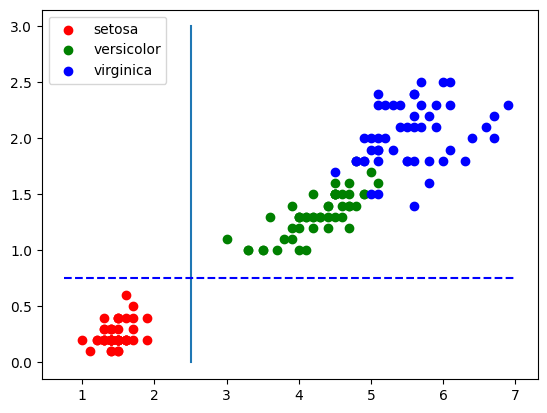

In [9]:
plot_2D(irisData.data, irisData.target, irisData.target_names)

# **II- Un premier apprentissage de classiffieur :**

In [10]:
nb = naive_bayes.MultinomialNB(fit_prior=True)# un algo d'apprentissage
nb.fit(irisData.data[:], irisData.target[:])
p31 = nb.predict(irisData.data[[31]])
print (p31)
plast = nb.predict(irisData.data[[-1]])
print (plast)
p = nb.predict(irisData.data[:])
print (p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
nb.predict(irisData.data[100:149])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

# **III- Evaluer les performances d'un classiffieur :**

**1. Performances sur l"nsemble d'apprentissage**

In [12]:
ea = 0
for i in range(len(irisData.data)):
    if (p[i] != irisData.target[i]):
        ea = ea+1
print(ea)
print (ea/len(irisData.data))

7
0.04666666666666667


In [13]:
numpy.nonzero(p-irisData.target)

(array([ 68,  70,  72,  83, 129, 131, 133]),)

In [14]:
nb.score(irisData.data,irisData.target)


0.6666666666666666

**2. Performances en généralisation**

***2.1 Test Split***

In [15]:
def split(S, size=2/3):
    # Mélangez les indices de l'échantillon
    indices = list(range(len(S.data)))
    random.shuffle(indices)

    # Calculez la taille de S1 en fonction de la taille spécifiée
    size_s1 = int(size * len(indices))

    # Divisez les indices en deux parties : indices_s1 et indices_s2
    indices_s1 = indices[:size_s1]
    indices_s2 = indices[size_s1:]

    # Créez les ensembles de données S1 et S2 en utilisant les indices calculés
    data_s1 = S.data[indices_s1]
    target_s1 = S.target[indices_s1]
    data_s2 = S.data[indices_s2]
    target_s2 = S.target[indices_s2]

    return [data_s1, target_s1, data_s2, target_s2]

# Exemple d'utilisation avec irisData
dataS1, targetS1, dataS2, targetS2 = split(irisData)

# Vérification des tailles
print("Taille de S1 (data):", len(dataS1))
print("Taille de S2 (data):", len(dataS2))

Taille de S1 (data): 100
Taille de S2 (data): 50


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
def splitV2(S, train_size=2/3):
    data = S.data
    target = S.target

    # Shuffle the data randomly
    data, target = shuffle(data, target)

    # Split the shuffled data and labels into training and testing sets
    dataS1, dataS2, targetS1, targetS2 = train_test_split(data, target, train_size=train_size, random_state=42)

    return [dataS1, targetS1, dataS2, targetS2]

In [17]:
from sklearn.naive_bayes import GaussianNB

def test(S, clf,split):
    dataS1, targetS1, dataS2, targetS2 = split(S)
    # Entraînez le modèle sur les données d'entraînement (S1)
    clf.fit(dataS1, targetS1)

    # Faites des prédictions sur les données de test (S2)
    predictions = clf.predict(dataS2)

    # Calculez le taux d'erreur en comparant les prédictions aux véritables étiquettes
    error_rate = 1 - (predictions == targetS2).mean()

    return error_rate

clf = naive_bayes.MultinomialNB(fit_prior=True)
error_rate = test(irisData, clf,split)

print("Taux d'erreur estimé avec Naive Bayes en utilisant split:", error_rate)



Taux d'erreur estimé avec Naive Bayes en utilisant split: 0.07999999999999996


In [18]:
import numpy as np
def test_t(S, clf, t,split):
    error_rates = []
    for _ in range(t):
        error_rate = test(S, clf,split)
        error_rates.append(error_rate)
    mean_error = np.mean(error_rates)
    return mean_error, error_rates

t_values = [10, 50, 100, 200, 500, 1000]
repetitions = 20

print("Test Split: Training Set = 1/3")
for t in t_values:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,split)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")

print("Test Split: Training Set = 1/10")
def split_9_10(S):
    return split(S, size=9/10)

for t in t_values:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,split_9_10)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")


Test Split: Training Set = 1/3
Taux d'erreur moyen pour t=10: 0.238
Taux d'erreur moyen pour t=50: 0.21120000000000005
Taux d'erreur moyen pour t=100: 0.21260000000000004
Taux d'erreur moyen pour t=200: 0.1885
Taux d'erreur moyen pour t=500: 0.199
Taux d'erreur moyen pour t=1000: 0.20218
Test Split: Training Set = 1/10
Taux d'erreur moyen pour t=10: 0.16666666666666666
Taux d'erreur moyen pour t=50: 0.14933333333333332
Taux d'erreur moyen pour t=100: 0.10866666666666663
Taux d'erreur moyen pour t=200: 0.132
Taux d'erreur moyen pour t=500: 0.11906666666666667
Taux d'erreur moyen pour t=1000: 0.12233333333333331


In [19]:
results = {'Algorithm': [], 't_values': [], 'Mean Error': []}

In [20]:
t_values = [10, 50, 100]
repetitions = 20
for t in t_values:
    clf =  naive_bayes.MultinomialNB(fit_prior=True)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,splitV2)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")
    results['Algorithm'].append('Multinomial Naive Bayes')
    results['t_values'].append(t)
    results['Mean Error'].append(mean_error)

Taux d'erreur moyen pour t=10: 0.11400000000000002
Taux d'erreur moyen pour t=50: 0.19
Taux d'erreur moyen pour t=100: 0.1984


In [21]:
from sklearn.tree import DecisionTreeClassifier

t_values = [10, 50, 100]
repetitions = 20
for t in t_values:
    clf = DecisionTreeClassifier()
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,split)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")
    results['Algorithm'].append('Decision Tree Classifier')
    results['t_values'].append(t)
    results['Mean Error'].append(mean_error)

Taux d'erreur moyen pour t=10: 0.05800000000000001
Taux d'erreur moyen pour t=50: 0.054800000000000015
Taux d'erreur moyen pour t=100: 0.055800000000000016


In [22]:
from sklearn.ensemble import RandomForestClassifier

t_values = [10, 50, 100]
repetitions = 20
for t in t_values:
    clf = RandomForestClassifier(n_estimators=100)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t,split)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")
    results['Algorithm'].append('Random Forest Classifier')
    results['t_values'].append(t)
    results['Mean Error'].append(mean_error)

Taux d'erreur moyen pour t=10: 0.03800000000000002
Taux d'erreur moyen pour t=50: 0.052800000000000014
Taux d'erreur moyen pour t=100: 0.05080000000000002


In [23]:
from sklearn.ensemble import BaggingClassifier
import numpy as np

t_values = [10, 50, 100]
repetitions = 20

for t in t_values:
    clf = BaggingClassifier(n_estimators=t)
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t, split)
        mean_errors.append(mean_error)
    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")
    results['Algorithm'].append('Bagging Classifier')
    results['t_values'].append(t)
    results['Mean Error'].append(mean_error)


Taux d'erreur moyen pour t=10: 0.05600000000000001
Taux d'erreur moyen pour t=50: 0.04600000000000002
Taux d'erreur moyen pour t=100: 0.05080000000000001


In [24]:
from sklearn.neighbors import KNeighborsClassifier

t_values = [10, 50, 100]
repetitions = 20

for t in t_values:
    clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
    mean_errors = []
    for _ in range(repetitions):
        mean_error, _ = test_t(irisData, clf, t, split)
        mean_errors.append(mean_error)

    std_error = np.std(mean_errors)
    print(f"Taux d'erreur moyen pour t={t}: {mean_error}")
    results['Algorithm'].append('KNeighbors Classifier')
    results['t_values'].append(t)
    results['Mean Error'].append(mean_error)


Taux d'erreur moyen pour t=10: 0.056000000000000015
Taux d'erreur moyen pour t=50: 0.044400000000000016
Taux d'erreur moyen pour t=100: 0.038400000000000024


In [25]:
# Convert the dictionary to a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(results)

# Display the DataFrame
df.head(25)

,Algorithm,t_values,Mean Error
0,Multinomial Naive Bayes,10,0.1140
1,Multinomial Naive Bayes,50,0.1900
2,Multinomial Naive Bayes,100,0.1984
3,Decision Tree Classifier,10,0.0580
4,Decision Tree Classifier,50,0.0548
5,Decision Tree Classifier,100,0.0558
6,Random Forest Classifier,10,0.0380
7,Random Forest Classifier,50,0.0528
8,Random Forest Classifier,100,0.0508
9,Bagging Classifier,10,0.0560


***2.1 Cross Validation***

In [26]:
results = {'Algorithm': [], 'Folds': [], 'Mean Error': []}

In [27]:
# Utilisation de cross_val_score pour estimer l'erreur réelle par validation croisée
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
folds_values = [2, 3, 5, 8, 10]
for folds in folds_values:
    clf = MultinomialNB(fit_prior=True)
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error = 1 - np.mean(scores)
    print(f"Taux d'erreur moyen avec {folds} folds: {mean_error}")
    results['Algorithm'].append('Multinomial Naive Bayes')
    results['Folds'].append(folds)
    results['Mean Error'].append(mean_error)

Taux d'erreur moyen avec 2 folds: 0.046666666666666634
Taux d'erreur moyen avec 3 folds: 0.053333333333333344
Taux d'erreur moyen avec 5 folds: 0.046666666666666634
Taux d'erreur moyen avec 8 folds: 0.05263157894736836
Taux d'erreur moyen avec 10 folds: 0.046666666666666634


In [28]:
from sklearn.tree import DecisionTreeClassifier

folds_values = [2, 3, 5, 8, 10]

for folds in folds_values:
    clf = DecisionTreeClassifier()  # You can adjust parameters as needed
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error = 1 - np.mean(scores)
    print(f"Taux d'erreur moyen avec {folds} folds: {mean_error}")
    results['Algorithm'].append('Decision Tree')
    results['Folds'].append(folds)
    results['Mean Error'].append(mean_error)

Taux d'erreur moyen avec 2 folds: 0.046666666666666634
Taux d'erreur moyen avec 3 folds: 0.033333333333333326
Taux d'erreur moyen avec 5 folds: 0.039999999999999813
Taux d'erreur moyen avec 8 folds: 0.03289473684210531
Taux d'erreur moyen avec 10 folds: 0.046666666666666634


In [29]:
folds_values = [2, 3, 5, 8, 10]
from sklearn.ensemble import BaggingClassifier

for folds in folds_values:
    clf = BaggingClassifier(n_estimators=100)  # You can adjust the number of estimators as needed
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error = 1 - np.mean(scores)
    print(f"Taux d'erreur moyen avec {folds} folds: {mean_error}")
    results['Algorithm'].append('Bagging Classifier')
    results['Folds'].append(folds)
    results['Mean Error'].append(mean_error)


Taux d'erreur moyen avec 2 folds: 0.040000000000000036
Taux d'erreur moyen avec 3 folds: 0.033333333333333326
Taux d'erreur moyen avec 5 folds: 0.033333333333333215
Taux d'erreur moyen avec 8 folds: 0.03289473684210531
Taux d'erreur moyen avec 10 folds: 0.03333333333333344


In [30]:
folds_values = [2, 3, 5, 8, 10]

for folds in folds_values:
    clf = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators as needed
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error = 1 - np.mean(scores)
    print(f"Taux d'erreur moyen avec {folds} folds: {mean_error}")
    results['Algorithm'].append('Random Forest')
    results['Folds'].append(folds)
    results['Mean Error'].append(mean_error)


Taux d'erreur moyen avec 2 folds: 0.040000000000000036
Taux d'erreur moyen avec 3 folds: 0.040000000000000036
Taux d'erreur moyen avec 5 folds: 0.033333333333333215
Taux d'erreur moyen avec 8 folds: 0.03289473684210531
Taux d'erreur moyen avec 10 folds: 0.03333333333333344


In [31]:
folds_values = [2, 3, 5, 8, 10]
from sklearn.neighbors import KNeighborsClassifier
for folds in folds_values:
    clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of estimators as needed
    scores = cross_val_score(clf, irisData.data, irisData.target, cv=folds)
    mean_error = 1 - np.mean(scores)
    print(f"Taux d'erreur moyen avec {folds} folds: {mean_error}")
    results['Algorithm'].append('K-Nearest Neighbors')
    results['Folds'].append(folds)
    results['Mean Error'].append(mean_error)


Taux d'erreur moyen avec 2 folds: 0.06000000000000005
Taux d'erreur moyen avec 3 folds: 0.020000000000000018
Taux d'erreur moyen avec 5 folds: 0.026666666666666616
Taux d'erreur moyen avec 8 folds: 0.03289473684210531
Taux d'erreur moyen avec 10 folds: 0.033333333333333215


In [32]:
# Convert the dictionary to a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(results)

# Display the DataFrame
df.head(25)

,Algorithm,Folds,Mean Error
0,Multinomial Naive Bayes,2,0.046667
1,Multinomial Naive Bayes,3,0.053333
2,Multinomial Naive Bayes,5,0.046667
3,Multinomial Naive Bayes,8,0.052632
4,Multinomial Naive Bayes,10,0.046667
5,Decision Tree,2,0.046667
6,Decision Tree,3,0.033333
7,Decision Tree,5,0.040000
8,Decision Tree,8,0.032895
9,Decision Tree,10,0.046667
